In [1]:
import sys
import os

# Adiciona o diretório src ao sys.path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Importa os módulos
from data_fetching import fetch_inmet_data
from MICE import preprocess_data_MICE, apply_mice, postprocess_data, evaluate_imputation, introduce_missing_values, optimize_data_types
from regression_pipeline import preprocess_data, train_and_evaluate_model, impute_missing_values, run_pipeline,plot_average_temperatures

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Composição do dataset

In [13]:
df_meta_dados = pd.read_csv('../dados/meta_dados_estacoes_2023.csv')
df_meta_dados.head()

ano  mes        data      hora id_estacao  precipitacao_total  \
0  2023    4  2023-04-09  03:00:00       A340                 1.8   
1  2023    4  2023-04-09  12:00:00       A367                 0.0   
2  2023    4  2023-04-09  00:00:00       A308                 0.0   
3  2023   12  2023-12-21  15:00:00       A369                 0.0   
4  2023   12  2023-12-21  18:00:00       A453                 0.0   

   pressao_atm_hora  pressao_atm_max  pressao_atm_min  radiacao_global  ...  \
0             997.9            998.7            997.8              NaN  ...   
1             987.0            987.3            986.6            415.8  ...   
2            1007.1           1007.1           1006.4              0.0  ...   
3             989.2            990.4            989.2           2249.1  ...   
4             981.8            982.4            981.8            200.0  ...   

   temperatura_max  temperatura_min  temperatura_orvalho_max  \
0             24.3             24.1                     24.1   
1             23.2             22.3                     23.0   
2             25.1             24.7                     24.8   
3             31.7             28.4                     31.7   
4             24.1             23.8                     23.9   

   temperatura_orvalho_min  umidade_rel_max  umidade_rel_min  \
0                     23.6             99.0             96.0   
1                     22.2             99.0             99.0   
2                     24.6             99.0             99.0   
3                     30.0            100.0             99.0   
4                     23.6             99.0             98.0   

   umidade_rel_hora  vento_direcao  vento_rajada_max  vento_velocidade  
0              99.0          287.0               4.2               1.9  
1              99.0          244.0               5.0               1.2  
2              99.0          133.0               3.8               1.9  
3              99.0            NaN               NaN               NaN  
4              99.0          149.0               6.3               3.2  

[5 rows x 22 columns]

In [28]:
blocos_de_anos = [list(range(2000, 2011)), list(range(2011, 2023))]
df_list = []
for bloco in blocos_de_anos:
    df = fetch_inmet_data(bloco)
    df_list.append(df)
df_meta_dados_2000_2022 = pd.concat(df_list, ignore_index=True)

Downloading: 100%|██████████| 8397312/8397312 [42:48<00:00, 3269.04rows/s]


In [29]:
df_meta_dados_completo = pd.concat([df_meta_dados_2000_2022, df_meta_dados], ignore_index=True)
df_meta_dados_completo.to_csv('../dados/meta_dados_estacoes_2000_2023.csv', index=False)

In [31]:
df_meta_dados_completo.head()

ano  mes        data      hora id_estacao  precipitacao_total  \
0  2007   11  2007-11-15  22:00:00       A526                 NaN   
1  2007    6  2007-06-26  01:00:00       A526                 NaN   
2  2007   11  2007-11-13  21:00:00       A526                 NaN   
3  2007   11  2007-11-13  07:00:00       A526                 NaN   
4  2007   11  2007-11-15  04:00:00       A526                 NaN   

   pressao_atm_hora  pressao_atm_max  pressao_atm_min  radiacao_global  ...  \
0               NaN              NaN              NaN              NaN  ...   
1               NaN              NaN              NaN              NaN  ...   
2               NaN              NaN              NaN              NaN  ...   
3               NaN              NaN              NaN              NaN  ...   
4               NaN              NaN              NaN              NaN  ...   

   temperatura_max  temperatura_min  temperatura_orvalho_max  \
0              NaN              NaN                      NaN   
1              NaN              NaN                      NaN   
2              NaN              NaN                      NaN   
3              NaN              NaN                      NaN   
4              NaN              NaN                      NaN   

   temperatura_orvalho_min  umidade_rel_max  umidade_rel_min  \
0                      NaN              NaN              NaN   
1                      NaN              NaN              NaN   
2                      NaN              NaN              NaN   
3                      NaN              NaN              NaN   
4                      NaN              NaN              NaN   

   umidade_rel_hora  vento_direcao  vento_rajada_max  vento_velocidade  
0               NaN            NaN               NaN               NaN  
1               NaN            NaN               NaN               NaN  
2               NaN            NaN               NaN               NaN  
3               NaN            NaN               NaN               NaN  
4               NaN            NaN               NaN               NaN  

[5 rows x 22 columns]

In [32]:
df_meta_dados_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11299944 entries, 0 to 11299943
Data columns (total 22 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ano                       Int64  
 1   mes                       Int64  
 2   data                      object 
 3   hora                      object 
 4   id_estacao                object 
 5   precipitacao_total        float64
 6   pressao_atm_hora          float64
 7   pressao_atm_max           float64
 8   pressao_atm_min           float64
 9   radiacao_global           float64
 10  temperatura_bulbo_hora    float64
 11  temperatura_orvalho_hora  float64
 12  temperatura_max           float64
 13  temperatura_min           float64
 14  temperatura_orvalho_max   float64
 15  temperatura_orvalho_min   float64
 16  umidade_rel_max           float64
 17  umidade_rel_min           float64
 18  umidade_rel_hora          float64
 19  vento_direcao             float64
 20  vento_rajada_max      

In [36]:
df_meta_dados_completo.isnull().sum()

ano                               0
mes                               0
data                              0
hora                              0
id_estacao                        0
precipitacao_total          2129442
pressao_atm_hora            1599241
pressao_atm_max             1606948
pressao_atm_min             1606883
radiacao_global             5872666
temperatura_bulbo_hora      1608340
temperatura_orvalho_hora    1790393
temperatura_max             1614014
temperatura_min             1613971
temperatura_orvalho_max     1801230
temperatura_orvalho_min     1803394
umidade_rel_max             1798222
umidade_rel_min             1802732
umidade_rel_hora            1788197
vento_direcao               1789859
vento_rajada_max            1801169
vento_velocidade            1790029
dtype: int64

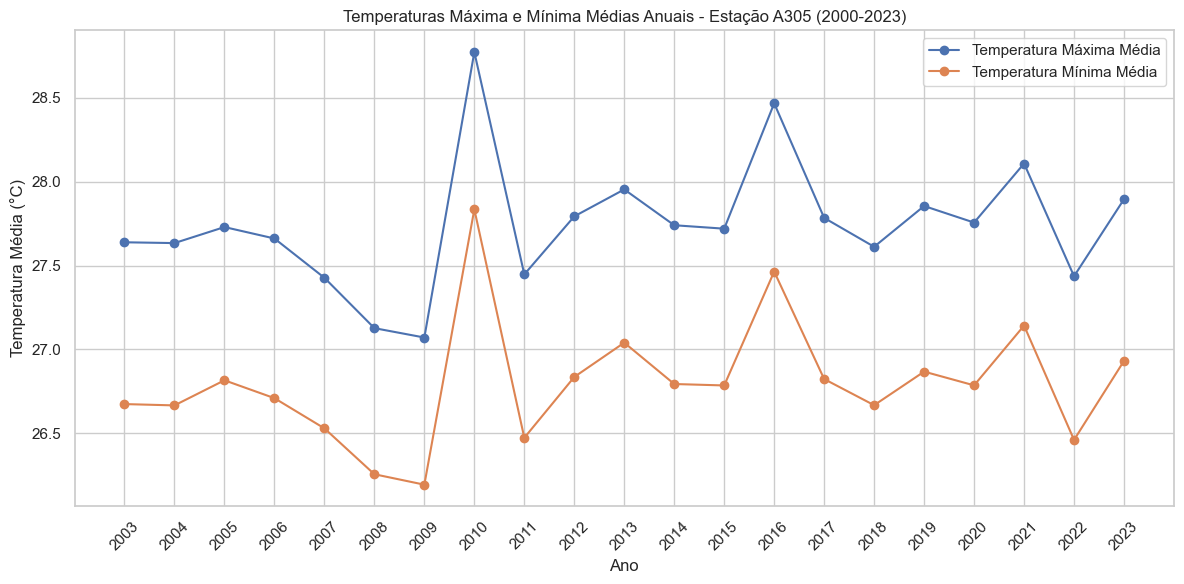

In [35]:
# Filtrar os dados para a estação 'A305' e anos de 2000 a 2023
df_estacao_A305 = df_meta_dados_completo[
    (df_meta_dados_completo['id_estacao'] == 'A305') & 
    (df_meta_dados_completo['ano'] >= 2000) & 
    (df_meta_dados_completo['ano'] <= 2023)
]

# Remover linhas com valores nulos nas colunas de temperatura
df_estacao_A305 = df_estacao_A305.dropna(subset=['temperatura_max', 'temperatura_min'])

# Agrupar por ano e calcular as médias das temperaturas máxima e mínima
temperatura_anual = df_estacao_A305.groupby('ano').agg(
    temperatura_max_media=('temperatura_max', 'mean'),
    temperatura_min_media=('temperatura_min', 'mean')
).reset_index()

# Converter 'ano' para inteiro
temperatura_anual['ano'] = temperatura_anual['ano'].astype(int)

# Verificar se há valores nulos
temperatura_anual = temperatura_anual.dropna(subset=['ano', 'temperatura_max_media', 'temperatura_min_media'])

# Criar listas de anos e posições
anos = temperatura_anual['ano'].tolist()
posicoes = range(len(anos))

# Plotar os dados usando as posições no eixo x
plt.figure(figsize=(12, 6))

plt.plot(
    posicoes, 
    temperatura_anual['temperatura_max_media'], 
    label='Temperatura Máxima Média', 
    marker='o', 
    linestyle='-'
)
plt.plot(
    posicoes, 
    temperatura_anual['temperatura_min_media'], 
    label='Temperatura Mínima Média', 
    marker='o', 
    linestyle='-'
)

plt.xlabel('Ano')
plt.ylabel('Temperatura Média (°C)')
plt.title('Temperaturas Máxima e Mínima Médias Anuais - Estação A305 (2000-2023)')

# Definir os ticks do eixo x usando as posições e os anos como rótulos
plt.xticks(posicoes, anos, rotation=45)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# MICE

O MICE (Multivariate Imputation by Chained Equations) é um método que imputa valores faltantes em múltiplas variáveis simultaneamente, utilizando modelos de regressão iterativos.

Em cada iteração, uma variável com valores ausentes é imputada utilizando um modelo que considera as outras variáveis como preditoras.

In [3]:
df_meta_dados_completo = pd.read_csv('../dados/meta_dados_estacoes_2000_2023.csv')

Métricas de erro para cada coluna:

Coluna: precipitacao_total
MAE: 0.2276
RMSE: 0.8587
R²: 0.0513

Coluna: pressao_atm_hora
MAE: 0.4034
RMSE: 2.4785
R²: 0.9895

Coluna: pressao_atm_max
MAE: 0.3833
RMSE: 2.4146
R²: 0.9900

Coluna: pressao_atm_min
MAE: 0.3789
RMSE: 2.4104
R²: 0.9900

Coluna: radiacao_global
MAE: 857.4604
RMSE: 2381.3648
R²: 0.2066

Coluna: temperatura_bulbo_hora
MAE: 0.2927
RMSE: 0.5104
R²: 0.9870

Coluna: temperatura_orvalho_hora
MAE: 0.2521
RMSE: 0.4293
R²: 0.9877

Coluna: temperatura_max
MAE: 0.3184
RMSE: 0.5094
R²: 0.9880

Coluna: temperatura_min
MAE: 0.3339
RMSE: 0.5306
R²: 0.9847

Coluna: temperatura_orvalho_max
MAE: 0.2906
RMSE: 0.4876
R²: 0.9835

Coluna: temperatura_orvalho_min
MAE: 0.3231
RMSE: 0.5168
R²: 0.9830

Coluna: umidade_rel_max
MAE: 1.2544
RMSE: 1.9931
R²: 0.9910

Coluna: umidade_rel_min
MAE: 1.3520
RMSE: 2.0745
R²: 0.9908

Coluna: umidade_rel_hora
MAE: 1.1289
RMSE: 1.9910
R²: 0.9913

Coluna: vento_direcao
MAE: 50.1956
RMSE: 68.5793
R²: 0.0836

Coluna:

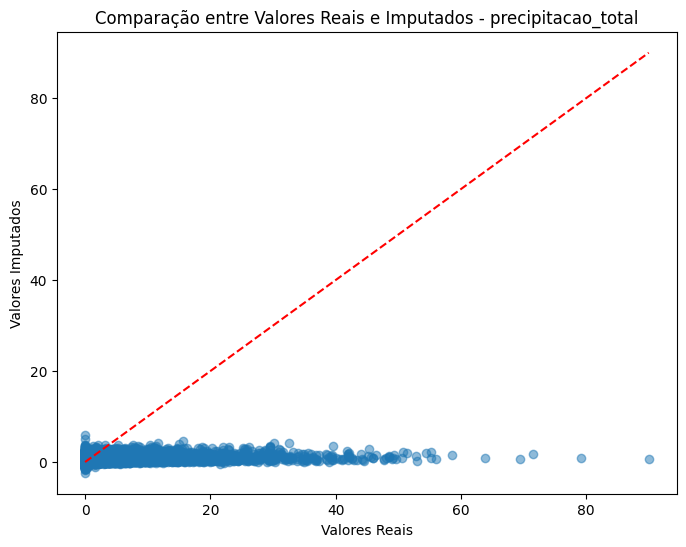

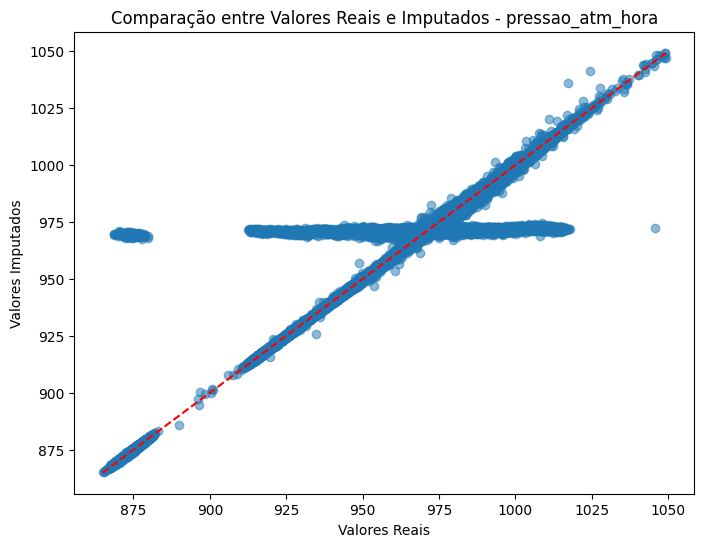

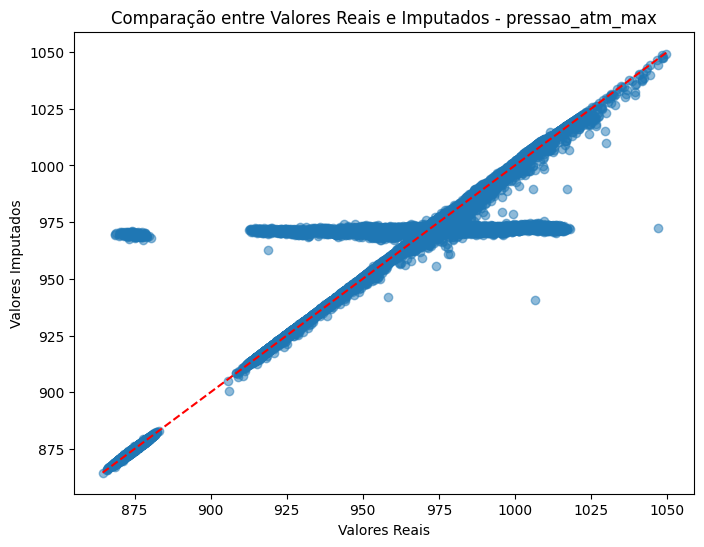

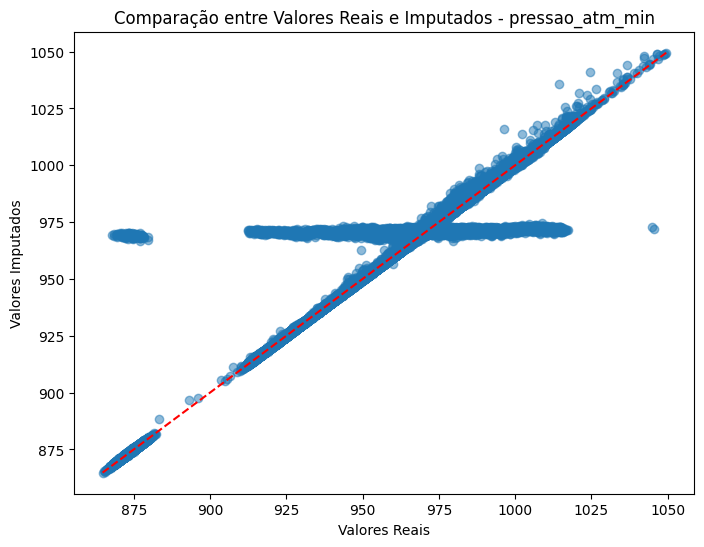

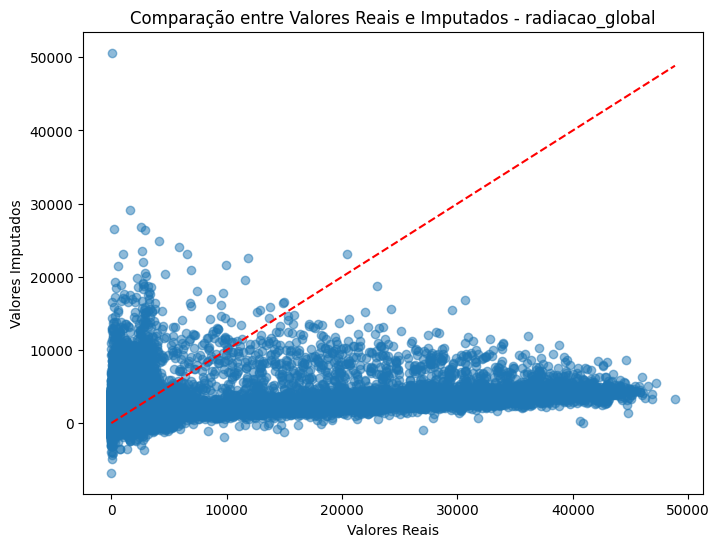

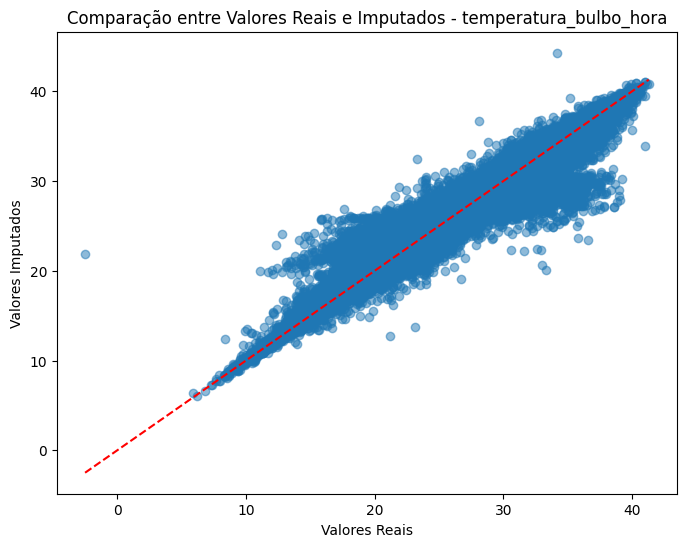

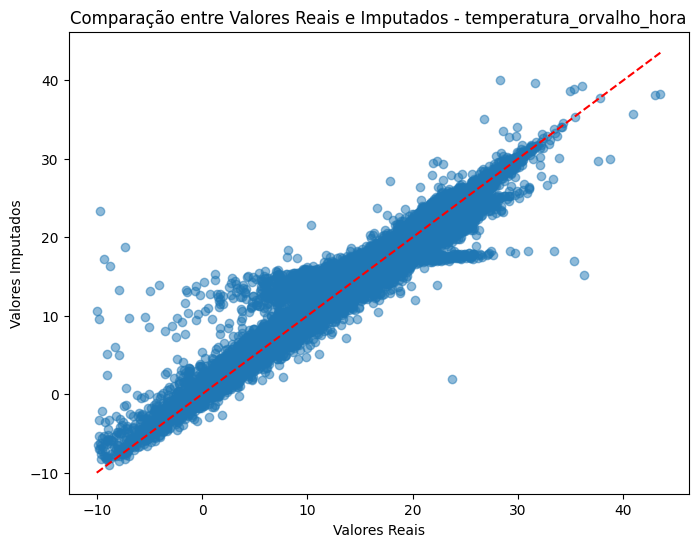

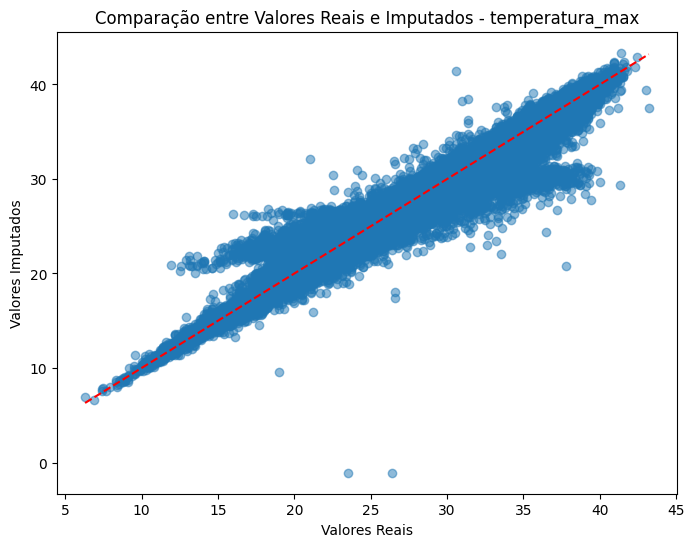

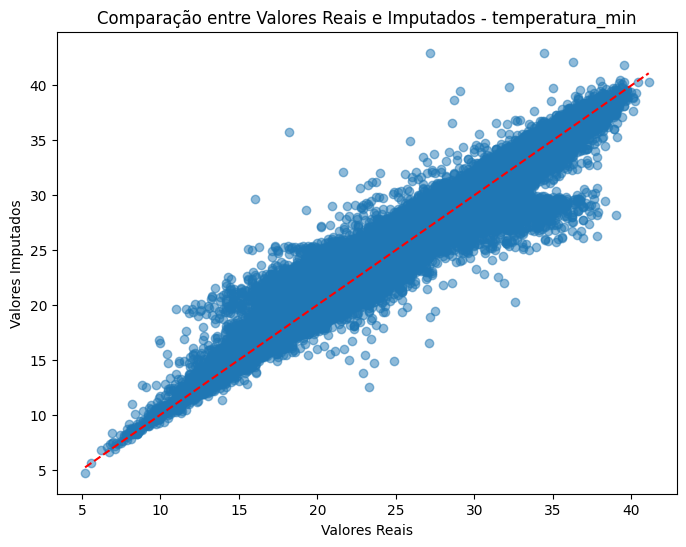

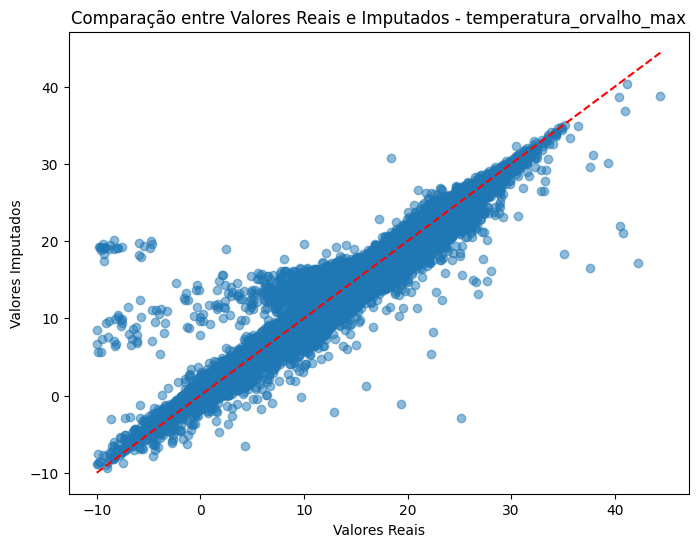

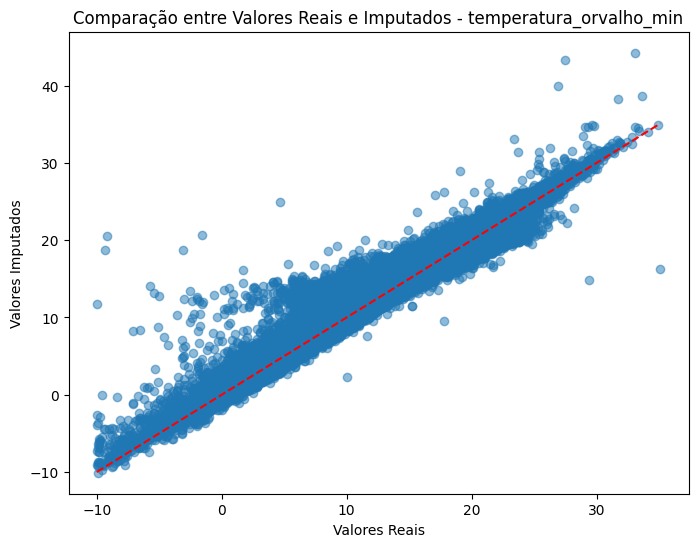

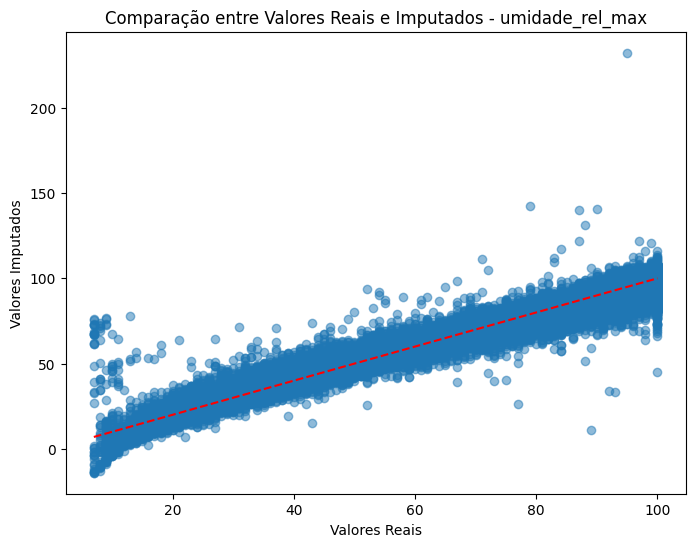

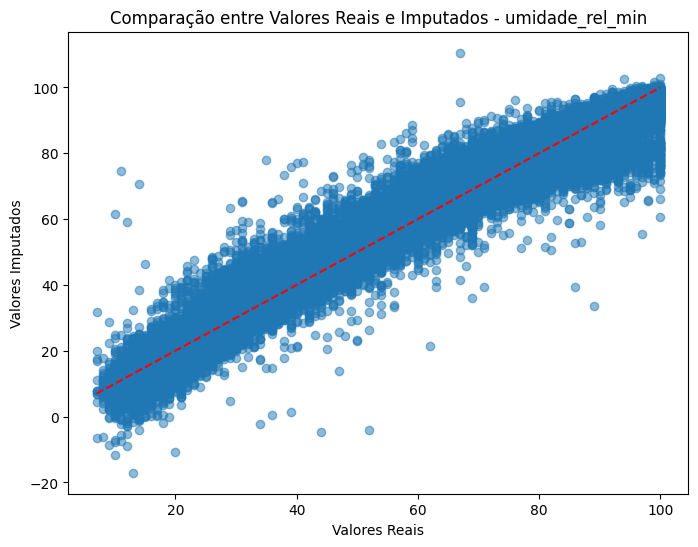

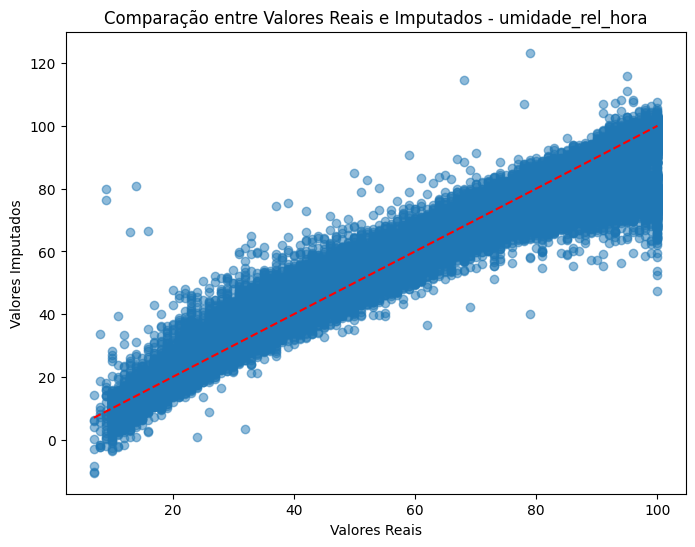

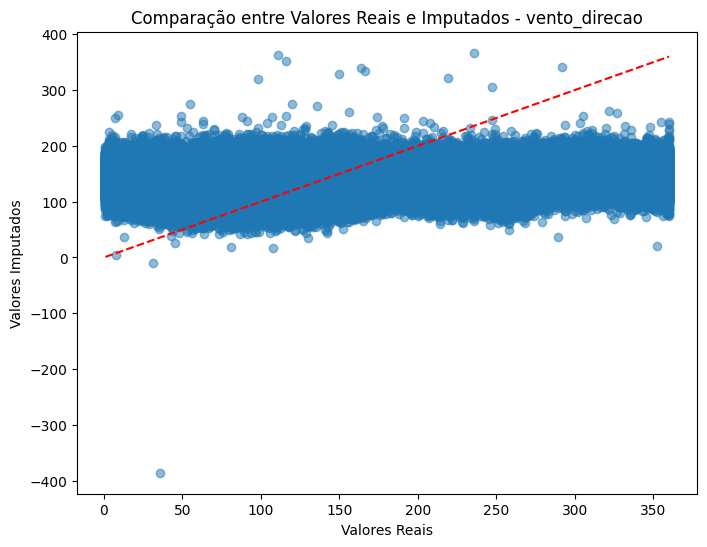

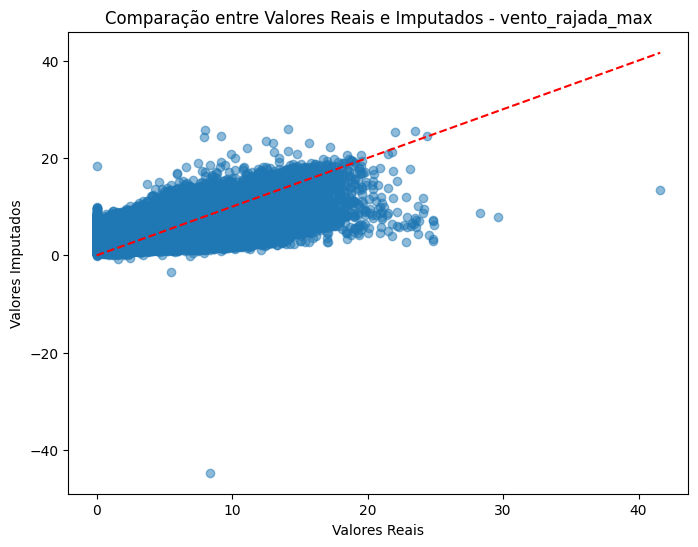

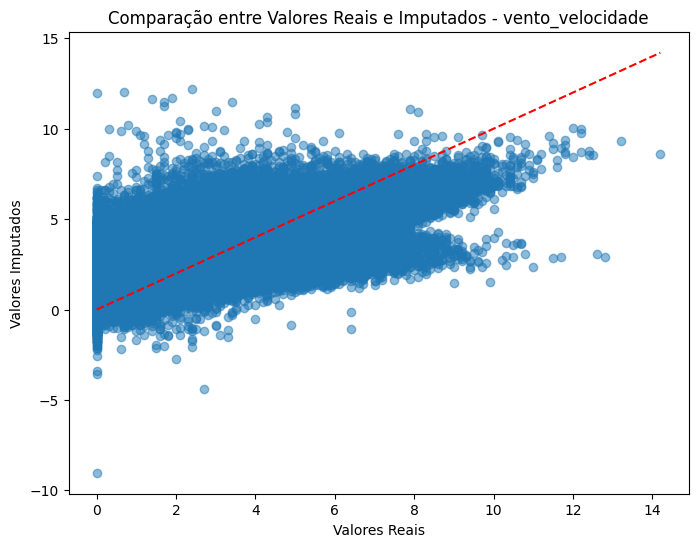

In [4]:
# Supondo que df_meta_dados_completo seja o seu dataset
df = df_meta_dados_completo.copy()

# Otimizar os tipos de dados para reduzir o uso de memória
df = optimize_data_types(df)

# 1. Pré-processamento
df_preprocessed, cols_to_impute, imputable_cols, label_encoder = preprocess_data_MICE(df, station_id=None)

# 2. Introduzir valores faltantes artificiais para avaliação
# Definir as colunas onde serão introduzidos valores faltantes artificiais
evaluation_cols = cols_to_impute.copy()  # Pode ajustar conforme necessário
missing_rate = 0.1  # Proporção de valores a serem removidos

df_missing, missing_info = introduce_missing_values(df_preprocessed, evaluation_cols, missing_rate)

# 3. Aplicar o MICE
df_imputed = apply_mice(df_missing, cols_to_impute, imputable_cols)

# 4. Pós-processamento
df_final = postprocess_data(df_imputed, label_encoder)

# 5. Avaliar a imputação
metrics = evaluate_imputation(df_preprocessed, df_final, missing_info)

# 6. Exibir os resultados
print("Métricas de erro para cada coluna:")
for col, metric in metrics.items():
    print(f"\nColuna: {col}")
    print(f"MAE: {metric['MAE']:.4f}")
    print(f"RMSE: {metric['RMSE']:.4f}")
    print(f"R²: {metric['R2']:.4f}")

# 7. Análise adicional (opcional)
# Exemplo: Plotar valores reais vs. imputados para uma coluna específica
import matplotlib.pyplot as plt

for col in evaluation_cols:
    indices = missing_info[col]['indices']
    true_values = missing_info[col]['values']
    imputed_values = df_final.loc[indices, col]

    plt.figure(figsize=(8, 6))
    plt.scatter(true_values, imputed_values, alpha=0.5)
    plt.plot([true_values.min(), true_values.max()], [true_values.min(), true_values.max()], 'r--')
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Imputados')
    plt.title(f'Comparação entre Valores Reais e Imputados - {col}')
    plt.show()


# Pré-processamento dos dados

In [8]:
# Nome da coluna alvo
target_column = 'temperatura_max'

# Processar os dados
df, X_train_scaled, X_test_scaled, y_train, y_test, scaler, label_encoder = preprocess_data(df_meta_dados, target_column)
df.head()

mes  hora  precipitacao_total  pressao_atm_hora  pressao_atm_max  \
1    4  12.0                 0.0             987.0            987.3   
2    4   0.0                 0.0            1007.1           1007.1   
4   12  18.0                 0.0             981.8            982.4   
8   12   9.0                 0.0             983.3            983.3   
9    4  18.0                 0.0            1006.9           1007.5   

   pressao_atm_min  radiacao_global  temperatura_bulbo_hora  \
1            986.6            415.8                    23.2   
2           1006.4              0.0                    24.7   
4            981.8            200.0                    24.0   
8            982.7             81.7                    23.1   
9           1006.9           2387.7                    34.7   

   temperatura_orvalho_hora  temperatura_max  ...  temperatura_orvalho_max  \
1                      23.0             23.2  ...                     23.0   
2                      24.6             25.1  ...                     24.8   
4                      23.8             24.1  ...                     23.9   
8                      22.9             23.1  ...                     23.0   
9                       6.1             35.1  ...                      8.6   

   temperatura_orvalho_min  umidade_rel_max  umidade_rel_min  \
1                     22.2             99.0             99.0   
2                     24.6             99.0             99.0   
4                     23.6             99.0             98.0   
8                     22.9             99.0             99.0   
9                      6.0             21.0             17.0   

   umidade_rel_hora  vento_direcao  vento_rajada_max  vento_velocidade  dia  \
1              99.0          244.0               5.0               1.2    9   
2              99.0          133.0               3.8               1.9    9   
4              99.0          149.0               6.3               3.2   21   
8              99.0          108.0               5.1               2.3   22   
9              17.0          143.0               5.7               1.9   11   

   id_estacao_encoded  
1                  44  
2                   3  
4                  77  
8                  77  
9                  15  

[5 rows x 21 columns]

In [9]:
df.isnull().sum()

mes                         0
hora                        0
precipitacao_total          0
pressao_atm_hora            0
pressao_atm_max             0
pressao_atm_min             0
radiacao_global             0
temperatura_bulbo_hora      0
temperatura_orvalho_hora    0
temperatura_max             0
temperatura_min             0
temperatura_orvalho_max     0
temperatura_orvalho_min     0
umidade_rel_max             0
umidade_rel_min             0
umidade_rel_hora            0
vento_direcao               0
vento_rajada_max            0
vento_velocidade            0
dia                         0
id_estacao_encoded          0
dtype: int64

# XGBoostRegressor

In [10]:
# Treinar o modelo e avaliar seu desempenho
best_model = train_and_evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.0919335015679414
Mean Absolute Error: 0.22079827700704746
R² Score: 0.9957386657713226


# Imputando os valores nulos

In [11]:
# Imputar os valores ausentes no dataset original
df_imputed = impute_missing_values(df_meta_dados, target_column, best_model,scaler,label_encoder)
df_imputed.head()

mes  hora  precipitacao_total  pressao_atm_hora  pressao_atm_max  \
0    4   3.0                 1.8             997.9            998.7   
1    4  12.0                 0.0             987.0            987.3   
2    4   0.0                 0.0            1007.1           1007.1   
3   12  15.0                 0.0             989.2            990.4   
4   12  18.0                 0.0             981.8            982.4   

   pressao_atm_min  radiacao_global  temperatura_bulbo_hora  \
0            997.8              NaN                    24.2   
1            986.6            415.8                    23.2   
2           1006.4              0.0                    24.7   
3            989.2           2249.1                    31.5   
4            981.8            200.0                    24.0   

   temperatura_orvalho_hora  temperatura_max  ...  umidade_rel_max  \
0                      24.0             24.3  ...             99.0   
1                      23.0             23.2  ...             99.0   
2                      24.6             25.1  ...             99.0   
3                      31.4             31.7  ...            100.0   
4                      23.8             24.1  ...             99.0   

   umidade_rel_min  umidade_rel_hora  vento_direcao  vento_rajada_max  \
0             96.0              99.0          287.0               4.2   
1             99.0              99.0          244.0               5.0   
2             99.0              99.0          133.0               3.8   
3             99.0              99.0            NaN               NaN   
4             98.0              99.0          149.0               6.3   

   vento_velocidade       data  id_estacao   ano temperatura_min  
0               1.9 2023-04-09        A340  2023            24.1  
1               1.2 2023-04-09        A367  2023            22.3  
2               1.9 2023-04-09        A308  2023            24.7  
3               NaN 2023-12-21        A369  2023            28.4  
4               3.2 2023-12-21        A453  2023            23.8  

[5 rows x 22 columns]

In [12]:
df_imputed.isnull().sum()

mes                              0
hora                             0
precipitacao_total          223159
pressao_atm_hora            145676
pressao_atm_max             146370
pressao_atm_min             146373
radiacao_global             394729
temperatura_bulbo_hora      147828
temperatura_orvalho_hora    182632
temperatura_max                  0
temperatura_orvalho_max     184453
temperatura_orvalho_min     184468
umidade_rel_max             176355
umidade_rel_min             176080
umidade_rel_hora            174502
vento_direcao               184662
vento_rajada_max            185800
vento_velocidade            179944
data                             0
id_estacao                       0
ano                              0
temperatura_min             148496
dtype: int64

In [13]:
# Nome da coluna alvo
target_column = 'temperatura_min'

# Processar os dados
df, X_train_scaled, X_test_scaled, y_train, y_test, scaler, label_encoder = preprocess_data(df_imputed, target_column)
df.head()

mes  hora  precipitacao_total  pressao_atm_hora  pressao_atm_max  \
1    4  12.0                 0.0             987.0            987.3   
2    4   0.0                 0.0            1007.1           1007.1   
4   12  18.0                 0.0             981.8            982.4   
8   12   9.0                 0.0             983.3            983.3   
9    4  18.0                 0.0            1006.9           1007.5   

   pressao_atm_min  radiacao_global  temperatura_bulbo_hora  \
1            986.6            415.8                    23.2   
2           1006.4              0.0                    24.7   
4            981.8            200.0                    24.0   
8            982.7             81.7                    23.1   
9           1006.9           2387.7                    34.7   

   temperatura_orvalho_hora  temperatura_max  ...  temperatura_orvalho_min  \
1                      23.0             23.2  ...                     22.2   
2                      24.6             25.1  ...                     24.6   
4                      23.8             24.1  ...                     23.6   
8                      22.9             23.1  ...                     22.9   
9                       6.1             35.1  ...                      6.0   

   umidade_rel_max  umidade_rel_min  umidade_rel_hora  vento_direcao  \
1             99.0             99.0              99.0          244.0   
2             99.0             99.0              99.0          133.0   
4             99.0             98.0              99.0          149.0   
8             99.0             99.0              99.0          108.0   
9             21.0             17.0              17.0          143.0   

   vento_rajada_max  vento_velocidade  temperatura_min  dia  \
1               5.0               1.2             22.3    9   
2               3.8               1.9             24.7    9   
4               6.3               3.2             23.8   21   
8               5.1               2.3             23.0   22   
9               5.7               1.9             34.2   11   

   id_estacao_encoded  
1                  44  
2                   3  
4                  77  
8                  77  
9                  15  

[5 rows x 21 columns]

In [14]:
df.isnull().sum()

mes                         0
hora                        0
precipitacao_total          0
pressao_atm_hora            0
pressao_atm_max             0
pressao_atm_min             0
radiacao_global             0
temperatura_bulbo_hora      0
temperatura_orvalho_hora    0
temperatura_max             0
temperatura_orvalho_max     0
temperatura_orvalho_min     0
umidade_rel_max             0
umidade_rel_min             0
umidade_rel_hora            0
vento_direcao               0
vento_rajada_max            0
vento_velocidade            0
temperatura_min             0
dia                         0
id_estacao_encoded          0
dtype: int64

In [15]:
# Treinar o modelo e avaliar seu desempenho
best_model = train_and_evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.08725274422406666
Mean Absolute Error: 0.21786895459118813
R² Score: 0.9955990661428303


In [16]:
# Imputar os valores ausentes no dataset original
df_imputed = impute_missing_values(df_imputed, target_column, best_model,scaler,label_encoder)
df_imputed.head()

mes  hora  precipitacao_total  pressao_atm_hora  pressao_atm_max  \
0    4   3.0                 1.8             997.9            998.7   
1    4  12.0                 0.0             987.0            987.3   
2    4   0.0                 0.0            1007.1           1007.1   
3   12  15.0                 0.0             989.2            990.4   
4   12  18.0                 0.0             981.8            982.4   

   pressao_atm_min  radiacao_global  temperatura_bulbo_hora  \
0            997.8              NaN                    24.2   
1            986.6            415.8                    23.2   
2           1006.4              0.0                    24.7   
3            989.2           2249.1                    31.5   
4            981.8            200.0                    24.0   

   temperatura_orvalho_hora  temperatura_orvalho_max  ...  umidade_rel_min  \
0                      24.0                     24.1  ...             96.0   
1                      23.0                     23.0  ...             99.0   
2                      24.6                     24.8  ...             99.0   
3                      31.4                     31.7  ...             99.0   
4                      23.8                     23.9  ...             98.0   

   umidade_rel_hora  vento_direcao  vento_rajada_max  vento_velocidade  \
0              99.0          287.0               4.2               1.9   
1              99.0          244.0               5.0               1.2   
2              99.0          133.0               3.8               1.9   
3              99.0            NaN               NaN               NaN   
4              99.0          149.0               6.3               3.2   

   temperatura_min       data  id_estacao   ano temperatura_max  
0             24.1 2023-04-09        A340  2023            24.3  
1             22.3 2023-04-09        A367  2023            23.2  
2             24.7 2023-04-09        A308  2023            25.1  
3             28.4 2023-12-21        A369  2023            31.7  
4             23.8 2023-12-21        A453  2023            24.1  

[5 rows x 22 columns]

In [17]:
df_imputed.isnull().sum()

mes                              0
hora                             0
precipitacao_total          223159
pressao_atm_hora            145676
pressao_atm_max             146370
pressao_atm_min             146373
radiacao_global             394729
temperatura_bulbo_hora      147828
temperatura_orvalho_hora    182632
temperatura_orvalho_max     184453
temperatura_orvalho_min     184468
umidade_rel_max             176355
umidade_rel_min             176080
umidade_rel_hora            174502
vento_direcao               184662
vento_rajada_max            185800
vento_velocidade            179944
temperatura_min                  0
data                             0
id_estacao                       0
ano                              0
temperatura_max                  0
dtype: int64

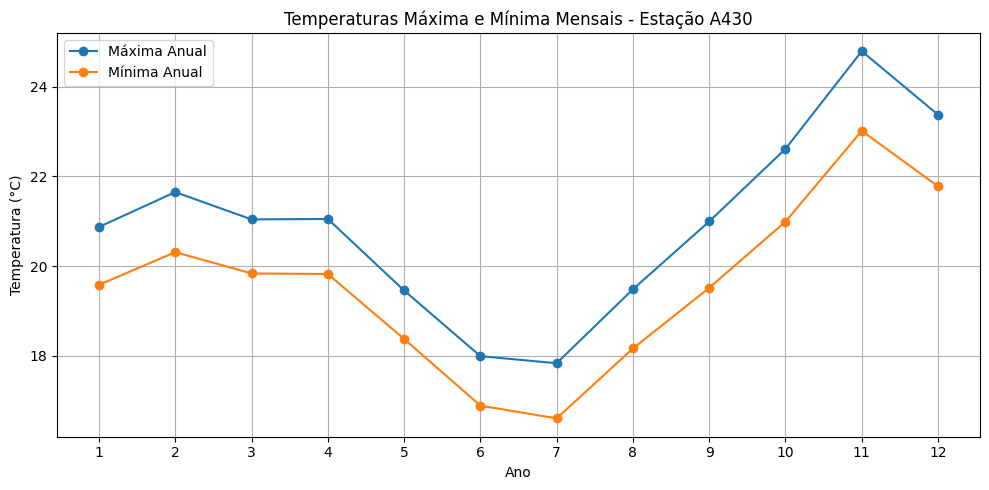

In [18]:
# Filtrar os dados apenas para a estação A305
dados_A305 = df_imputed[df_imputed['id_estacao'] == 'A430']

# Agrupar por ano e calcular a temperatura máxima e mínima anual
temperatura_anual = dados_A305.groupby('mes').agg(
    temperatura_max=('temperatura_max', 'mean'),
    temperatura_min=('temperatura_min', 'mean')
).reset_index()

# Plotar a série temporal anual
plt.figure(figsize=(10, 5))  # Ajusta o tamanho do gráfico
plt.plot(temperatura_anual['mes'], temperatura_anual['temperatura_max'], label='Máxima Anual', marker='o')
plt.plot(temperatura_anual['mes'], temperatura_anual['temperatura_min'], label='Mínima Anual', marker='o')

plt.xlabel('Ano')
plt.ylabel('Temperatura (°C)')
plt.title('Temperaturas Máxima e Mínima Mensais - Estação A430')
plt.xticks(range(temperatura_anual['mes'].min(), temperatura_anual['mes'].max() + 1))  # Define os ticks do eixo x para cada ano
plt.legend()
plt.grid(True)  # Adiciona uma grade para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

In [ ]:
# salvar na pasta com todos os outros anos

# Processo para todos os anos

Processando o ano 2003...


Downloading: 100%|██████████| 46848/46848 [00:15<00:00, 3033.29rows/s]


Processing target column: temperatura_max
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.10619152654898203
Mean Absolute Error: 0.20681608033332738
R² Score: 0.9925131692684785
Remaining missing values in temperatura_max: 0
Processing target column: temperatura_min
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.04869016366735081
Mean Absolute Error: 0.1601468596631276
R² Score: 0.9958424646970422
Remaining missing values in temperatura_min: 0
Dataset imputado para 2003 salvo com sucesso em ../dados/estacoes/dataset_imputed_2003.csv
Iniciando plotagem para o ano 2003...


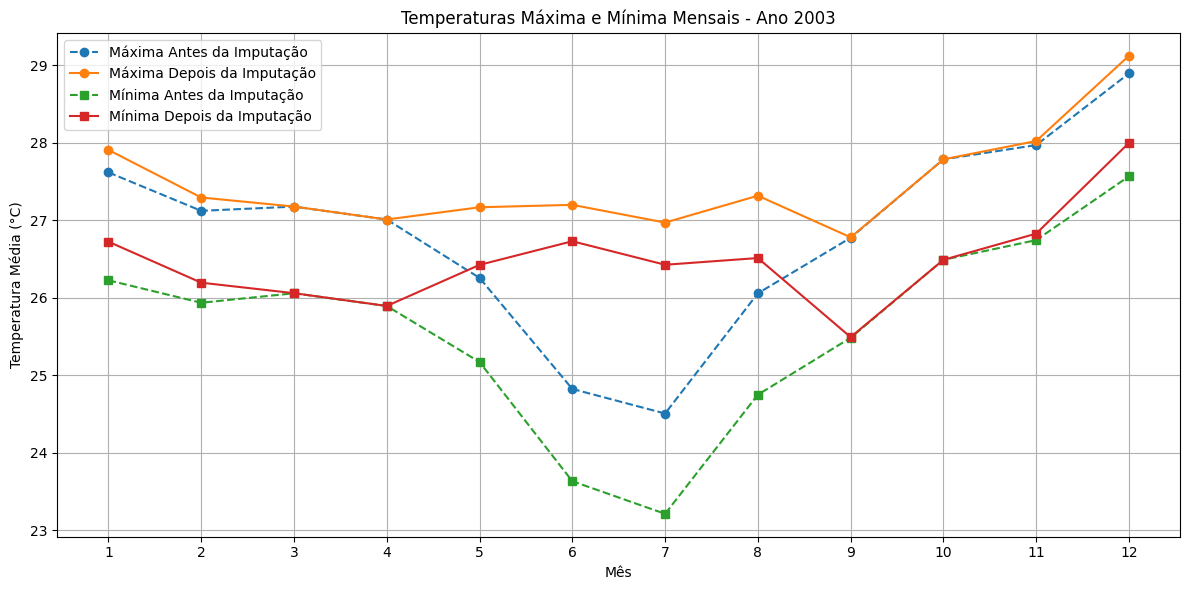

Processando o ano 2004...


Downloading: 100%|██████████| 54816/54816 [00:23<00:00, 2328.65rows/s]


Processing target column: temperatura_max
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.09187225980389603
Mean Absolute Error: 0.20798646557125158
R² Score: 0.9936587095835158
Remaining missing values in temperatura_max: 0
Processing target column: temperatura_min
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.049347715094273256
Mean Absolute Error: 0.15566461164068127
R² Score: 0.9959415579798949
Remaining missing values in temperatura_min: 0
Dataset imputado para 2004 salvo com sucesso em ../dados/estacoes/dataset_imputed_2004.csv
Iniciando plotagem para o ano 2004...


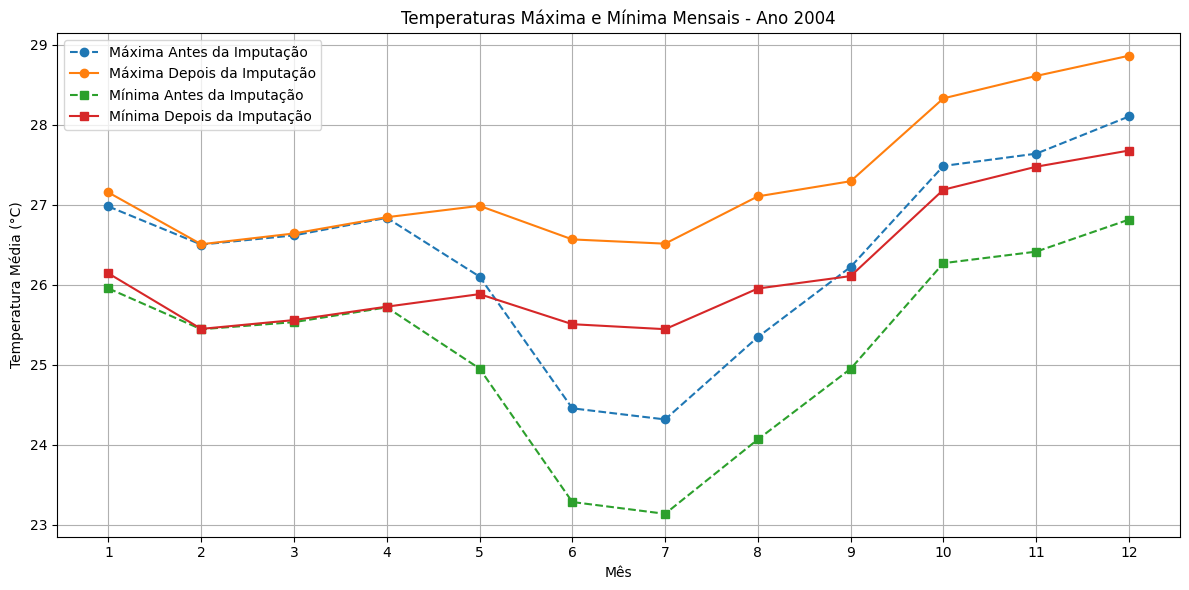

Processando o ano 2005...


Downloading: 100%|██████████| 70080/70080 [00:28<00:00, 2450.97rows/s]


Processing target column: temperatura_max
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.0921757213687772
Mean Absolute Error: 0.2124436732898341
R² Score: 0.9956357609308393
Remaining missing values in temperatura_max: 0
Processing target column: temperatura_min
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.07793839434159514
Mean Absolute Error: 0.19696575820322607
R² Score: 0.9956073433748793
Remaining missing values in temperatura_min: 0
Dataset imputado para 2005 salvo com sucesso em ../dados/estacoes/dataset_imputed_2005.csv
Iniciando plotagem para o ano 2005...


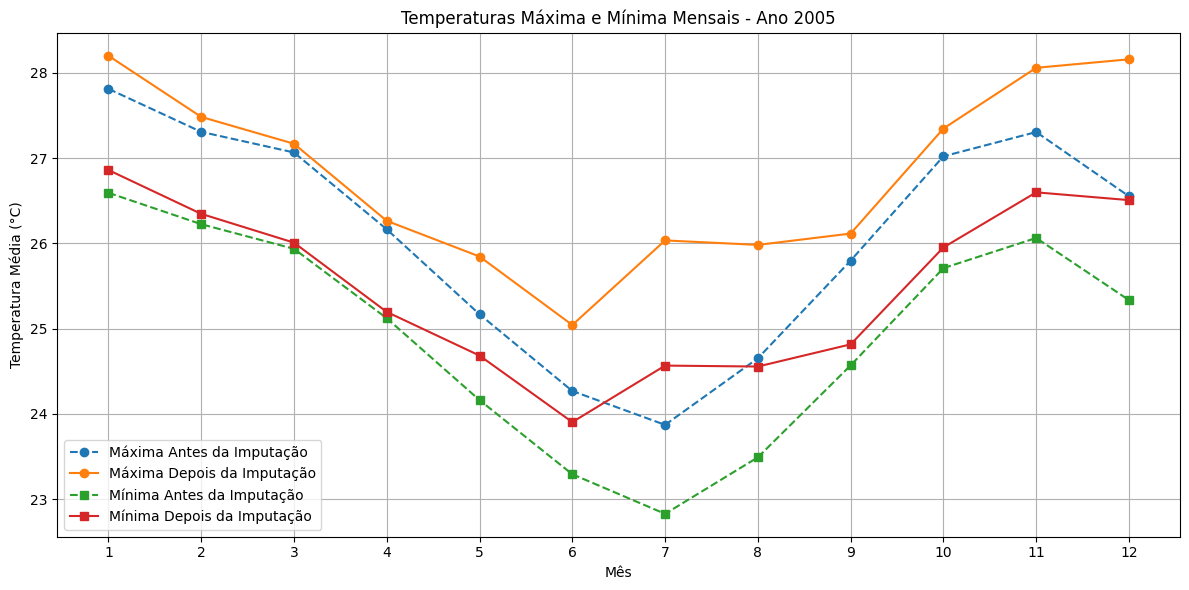

Processando o ano 2006...


Downloading: 100%|██████████| 70320/70320 [00:29<00:00, 2415.65rows/s]


Processing target column: temperatura_max
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.09608221745352101
Mean Absolute Error: 0.2233522954733134
R² Score: 0.9946374972729866
Remaining missing values in temperatura_max: 0
Processing target column: temperatura_min
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.07920788608212496
Mean Absolute Error: 0.21017785943983236
R² Score: 0.9949716873102072
Remaining missing values in temperatura_min: 0
Dataset imputado para 2006 salvo com sucesso em ../dados/estacoes/dataset_imputed_2006.csv
Iniciando plotagem para o ano 2006...


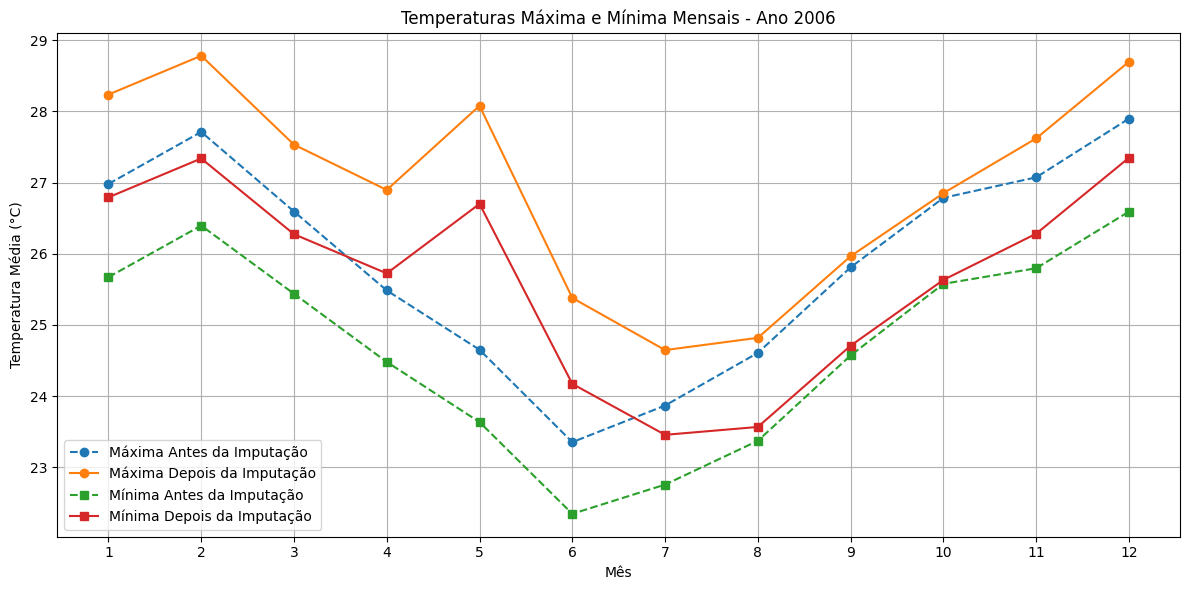

Processando o ano 2007...


Downloading: 100%|██████████| 192696/192696 [01:12<00:00, 2647.69rows/s]


Processing target column: temperatura_max
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.08605209332934825
Mean Absolute Error: 0.21409118502083832
R² Score: 0.9962143241103846
Remaining missing values in temperatura_max: 0
Processing target column: temperatura_min
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.07752856087244729
Mean Absolute Error: 0.20812998569821847
R² Score: 0.9963521057141789
Remaining missing values in temperatura_min: 0
Dataset imputado para 2007 salvo com sucesso em ../dados/estacoes/dataset_imputed_2007.csv
Iniciando plotagem para o ano 2007...


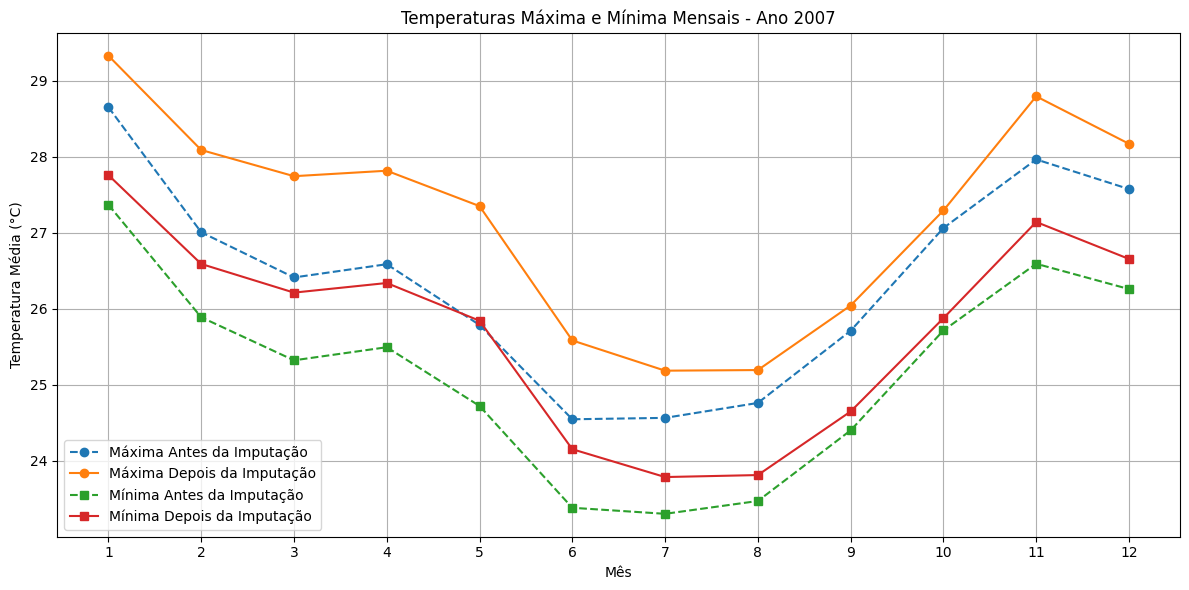

Processando o ano 2008...


Downloading: 100%|██████████| 498720/498720 [03:18<00:00, 2512.97rows/s]


Processing target column: temperatura_max
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.0850678187760744
Mean Absolute Error: 0.2132825180891673
R² Score: 0.9960387979245422
Remaining missing values in temperatura_max: 0
Processing target column: temperatura_min
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.07855336374062451
Mean Absolute Error: 0.20752430664003713
R² Score: 0.9960992004154311
Remaining missing values in temperatura_min: 0
Dataset imputado para 2008 salvo com sucesso em ../dados/estacoes/dataset_imputed_2008.csv
Iniciando plotagem para o ano 2008...


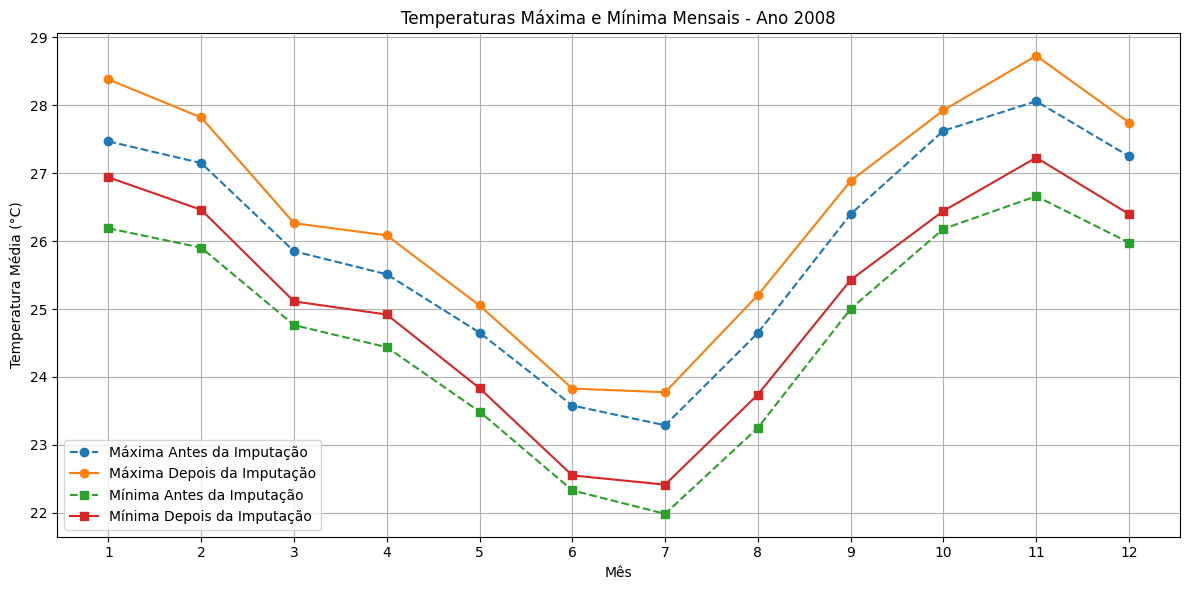

Processando o ano 2009...


Downloading: 100%|██████████| 610536/610536 [02:54<00:00, 3504.85rows/s]


Processing target column: temperatura_max
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.08623353994913038
Mean Absolute Error: 0.20441625422695367
R² Score: 0.9955020534981882
Remaining missing values in temperatura_max: 0
Processing target column: temperatura_min
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.07244247996102847
Mean Absolute Error: 0.19678703690717914
R² Score: 0.9958097284437107
Remaining missing values in temperatura_min: 0
Dataset imputado para 2009 salvo com sucesso em ../dados/estacoes/dataset_imputed_2009.csv
Iniciando plotagem para o ano 2009...


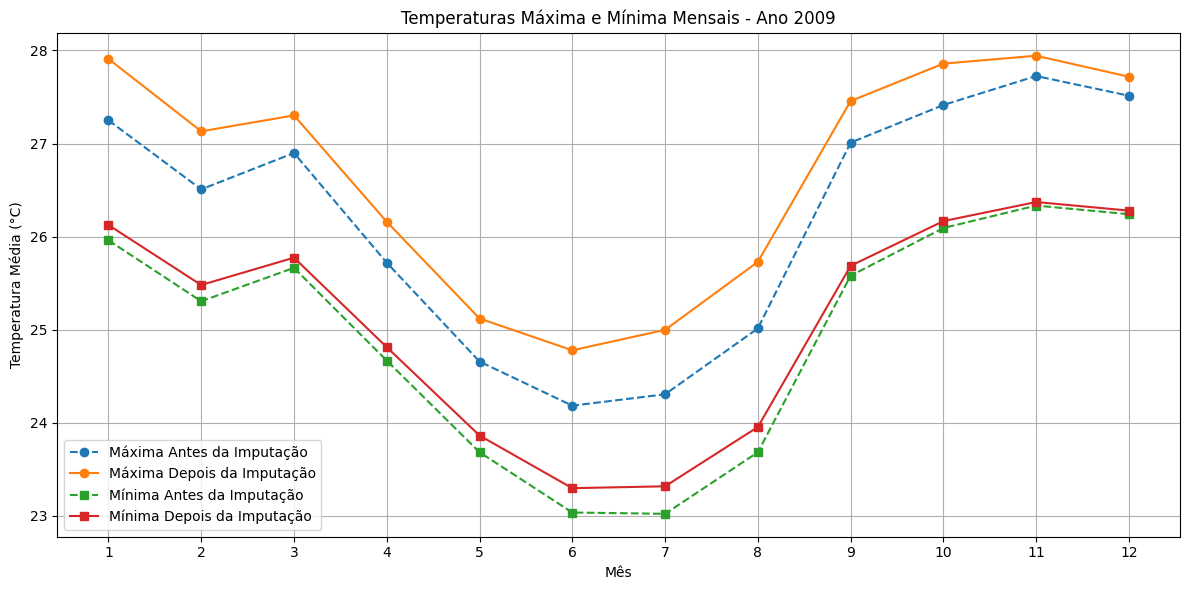

Processando o ano 2010...


Downloading: 100%|██████████| 624792/624792 [03:05<00:00, 3366.71rows/s]


Processing target column: temperatura_max
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.08388210798028624
Mean Absolute Error: 0.21053007856359598
R² Score: 0.9960041010719626
Remaining missing values in temperatura_max: 0
Processing target column: temperatura_min
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.07941264849903058
Mean Absolute Error: 0.20546105436899015
R² Score: 0.9958983205841211
Remaining missing values in temperatura_min: 0
Dataset imputado para 2010 salvo com sucesso em ../dados/estacoes/dataset_imputed_2010.csv
Iniciando plotagem para o ano 2010...


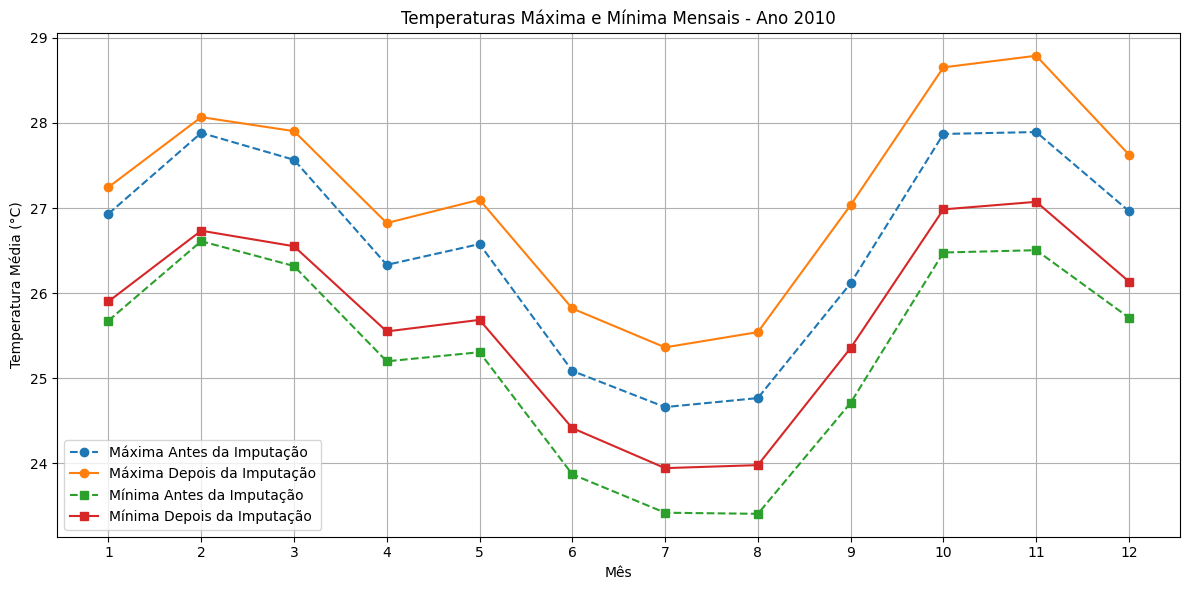

Processando o ano 2011...


Downloading: 100%|██████████| 639480/639480 [02:59<00:00, 3557.28rows/s]


Processing target column: temperatura_max
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.0872952853178846
Mean Absolute Error: 0.21458777781525826
R² Score: 0.995510245888813
Remaining missing values in temperatura_max: 0
Processing target column: temperatura_min
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.08252334199150198
Mean Absolute Error: 0.20824075401091416
R² Score: 0.9953461461759487
Remaining missing values in temperatura_min: 0
Dataset imputado para 2011 salvo com sucesso em ../dados/estacoes/dataset_imputed_2011.csv
Iniciando plotagem para o ano 2011...


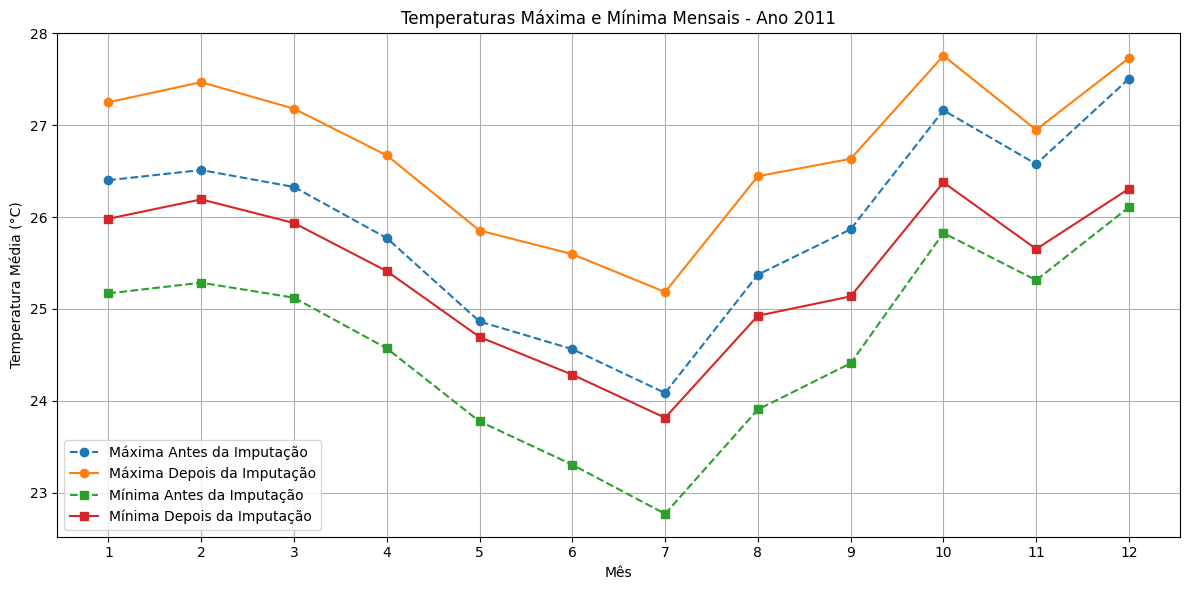

Processando o ano 2012...


Downloading: 100%|██████████| 641232/641232 [03:07<00:00, 3417.76rows/s]


Processing target column: temperatura_max
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.0869680142444434
Mean Absolute Error: 0.21598206939374823
R² Score: 0.9960300156508248
Remaining missing values in temperatura_max: 0
Processing target column: temperatura_min
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.08097346609026462
Mean Absolute Error: 0.20780747254813403
R² Score: 0.996055902690462
Remaining missing values in temperatura_min: 0
Dataset imputado para 2012 salvo com sucesso em ../dados/estacoes/dataset_imputed_2012.csv
Iniciando plotagem para o ano 2012...


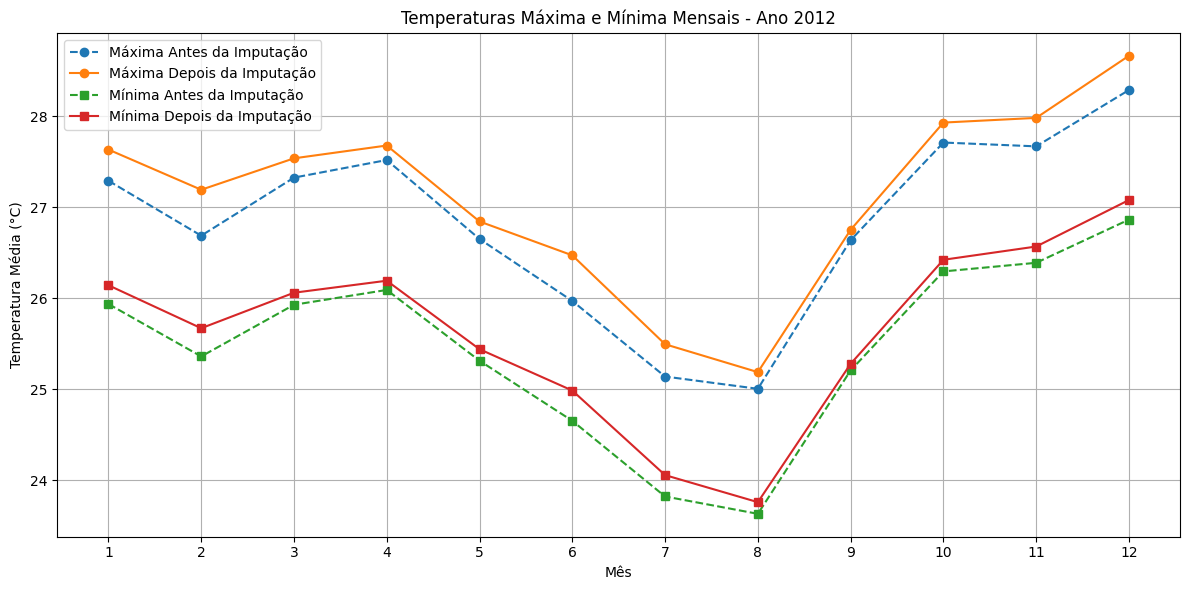

Processando o ano 2013...


Downloading: 100%|██████████| 639480/639480 [03:07<00:00, 3414.26rows/s]


Processing target column: temperatura_max
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.08219113738129681
Mean Absolute Error: 0.21026231943757404
R² Score: 0.9960190088704075
Remaining missing values in temperatura_max: 0
Processing target column: temperatura_min
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.07702190679096518
Mean Absolute Error: 0.20496368120191846
R² Score: 0.9959785863588673
Remaining missing values in temperatura_min: 0
Dataset imputado para 2013 salvo com sucesso em ../dados/estacoes/dataset_imputed_2013.csv
Iniciando plotagem para o ano 2013...


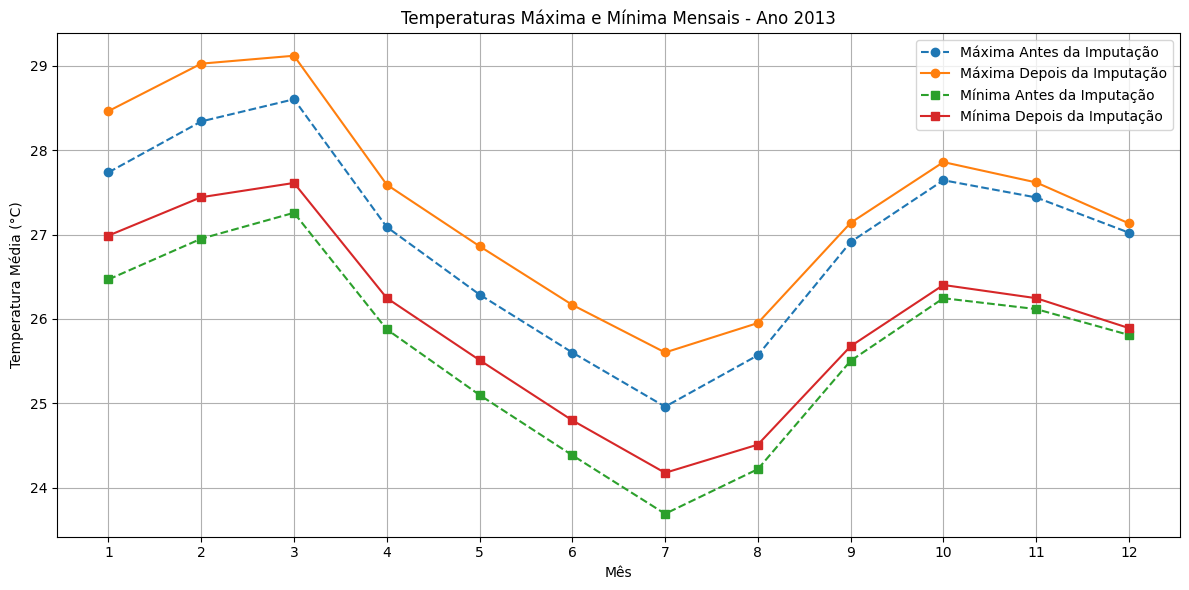

Processando o ano 2014...


Downloading: 100%|██████████| 639480/639480 [03:14<00:00, 3294.89rows/s]


Processing target column: temperatura_max
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.08386543427540592
Mean Absolute Error: 0.21300564108742956
R² Score: 0.9957315704580479
Remaining missing values in temperatura_max: 0
Processing target column: temperatura_min
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.07869614691977242
Mean Absolute Error: 0.20979885613906094
R² Score: 0.995703144121391
Remaining missing values in temperatura_min: 0
Dataset imputado para 2014 salvo com sucesso em ../dados/estacoes/dataset_imputed_2014.csv
Iniciando plotagem para o ano 2014...


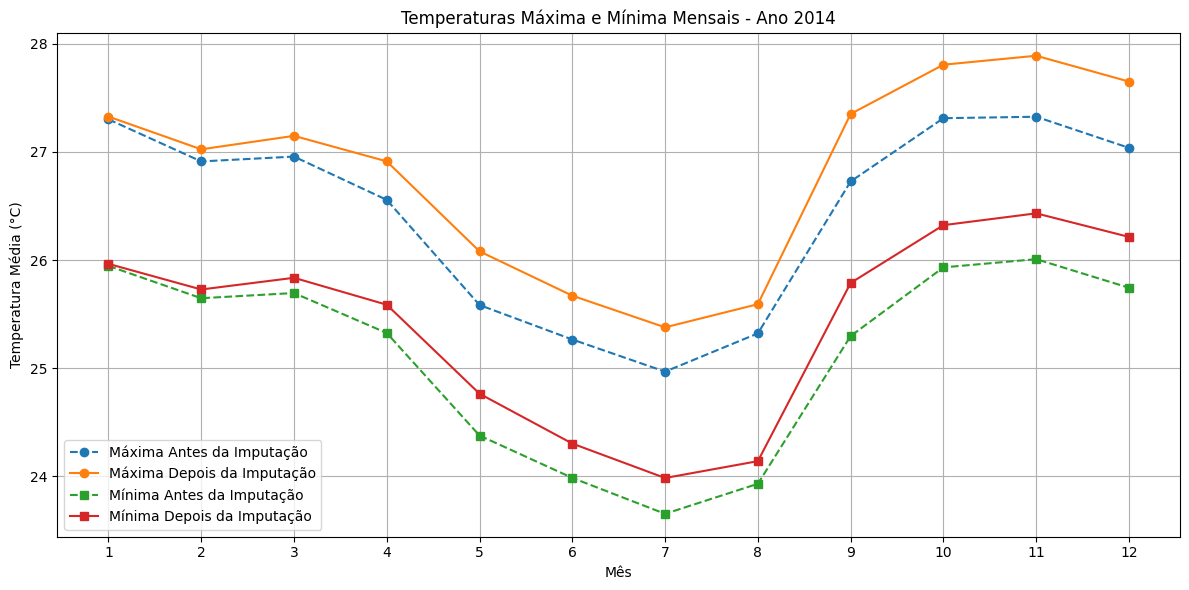

Processando o ano 2015...


Downloading: 100%|██████████| 646080/646080 [03:13<00:00, 3336.70rows/s]


Processing target column: temperatura_max
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.09009946424561281
Mean Absolute Error: 0.22020066997449164
R² Score: 0.9959824310647876
Remaining missing values in temperatura_max: 0
Processing target column: temperatura_min
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.08560063747773197
Mean Absolute Error: 0.21712506957811467
R² Score: 0.9959531146543278
Remaining missing values in temperatura_min: 0
Dataset imputado para 2015 salvo com sucesso em ../dados/estacoes/dataset_imputed_2015.csv
Iniciando plotagem para o ano 2015...


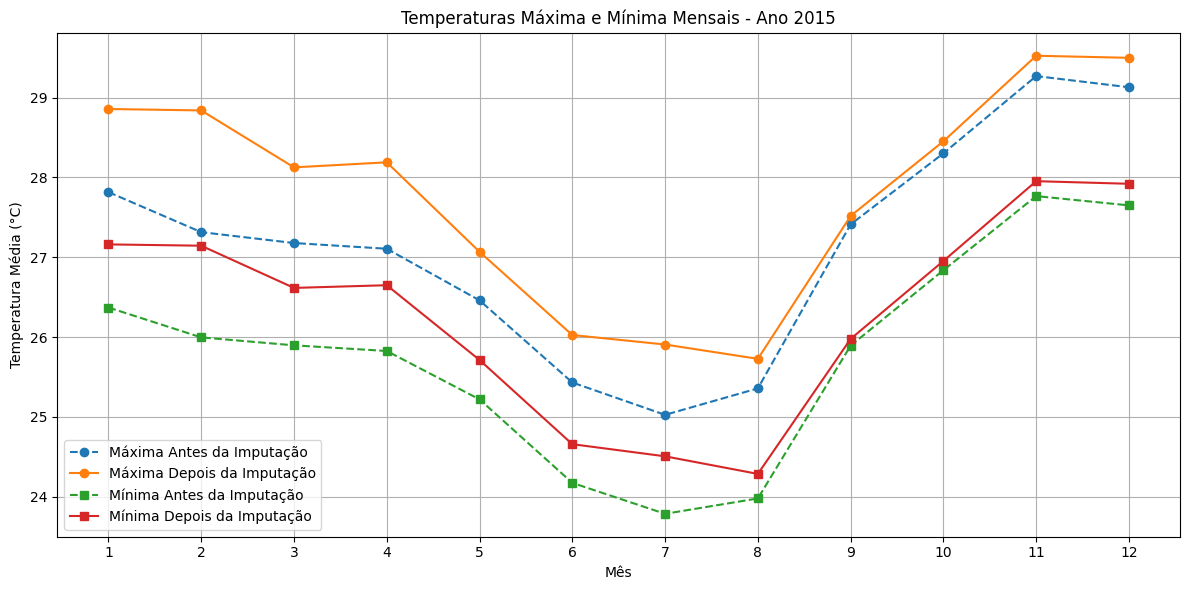

Processando o ano 2016...


Downloading: 100%|██████████| 676128/676128 [03:20<00:00, 3372.62rows/s]


Processing target column: temperatura_max
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.08877783256760495
Mean Absolute Error: 0.21660121616209652
R² Score: 0.9956619077752388
Remaining missing values in temperatura_max: 0
Processing target column: temperatura_min
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.08031693331140374
Mean Absolute Error: 0.2115725400491307
R² Score: 0.9958696750278317
Remaining missing values in temperatura_min: 0
Dataset imputado para 2016 salvo com sucesso em ../dados/estacoes/dataset_imputed_2016.csv
Iniciando plotagem para o ano 2016...


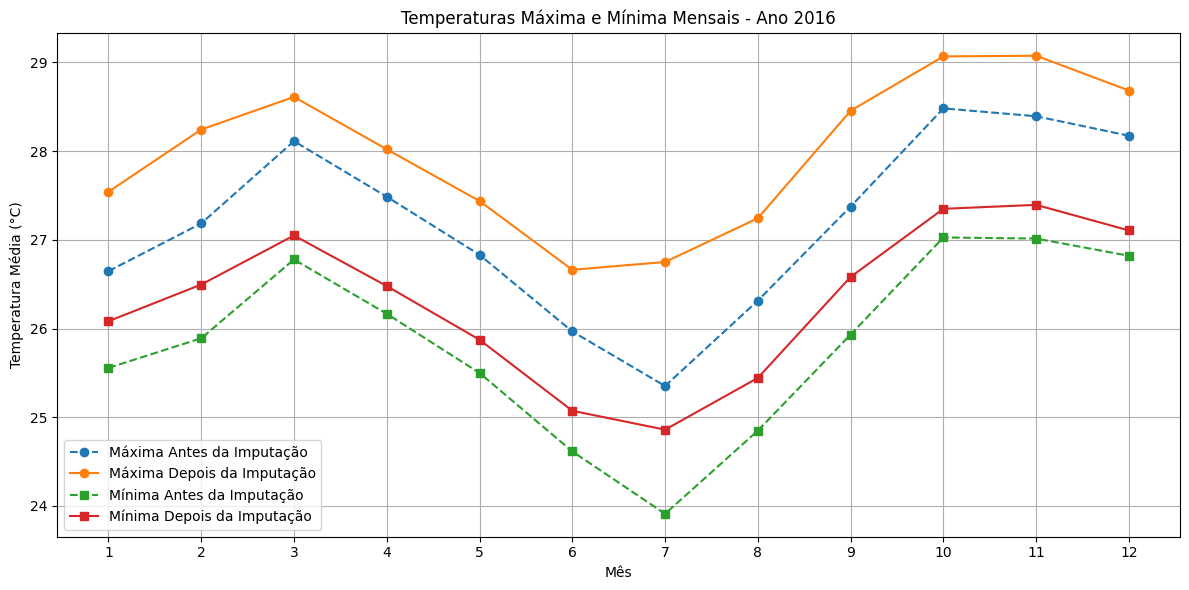

Processando o ano 2017...


Downloading: 100%|██████████| 712656/712656 [03:16<00:00, 3626.54rows/s]


Processing target column: temperatura_max
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.08649524211086829
Mean Absolute Error: 0.2151461678723719
R² Score: 0.9959396858971764
Remaining missing values in temperatura_max: 0
Processing target column: temperatura_min
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.08201758935754352
Mean Absolute Error: 0.21152211126978454
R² Score: 0.995872950036382
Remaining missing values in temperatura_min: 0
Dataset imputado para 2017 salvo com sucesso em ../dados/estacoes/dataset_imputed_2017.csv
Iniciando plotagem para o ano 2017...


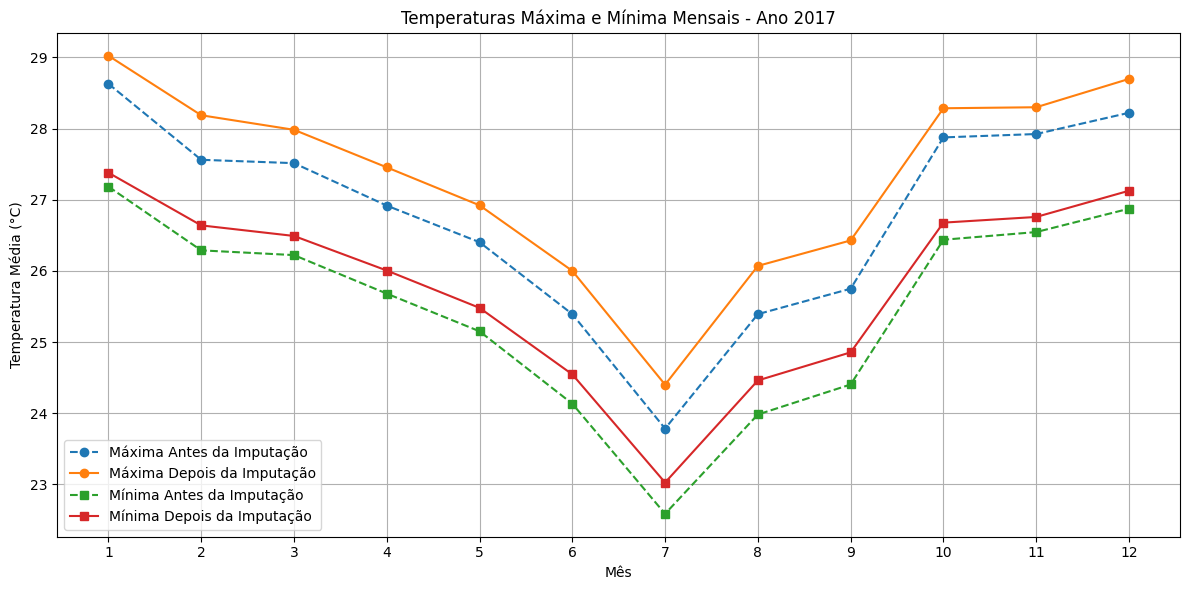

Processando o ano 2018...


Downloading: 100%|██████████| 760968/760968 [03:39<00:00, 3467.50rows/s]


Processing target column: temperatura_max
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.08970905838920105
Mean Absolute Error: 0.21682927318053893
R² Score: 0.9954990947298898
Remaining missing values in temperatura_max: 0
Processing target column: temperatura_min
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.08521357061281025
Mean Absolute Error: 0.21549985415439196
R² Score: 0.9954492319483699
Remaining missing values in temperatura_min: 0
Dataset imputado para 2018 salvo com sucesso em ../dados/estacoes/dataset_imputed_2018.csv
Iniciando plotagem para o ano 2018...


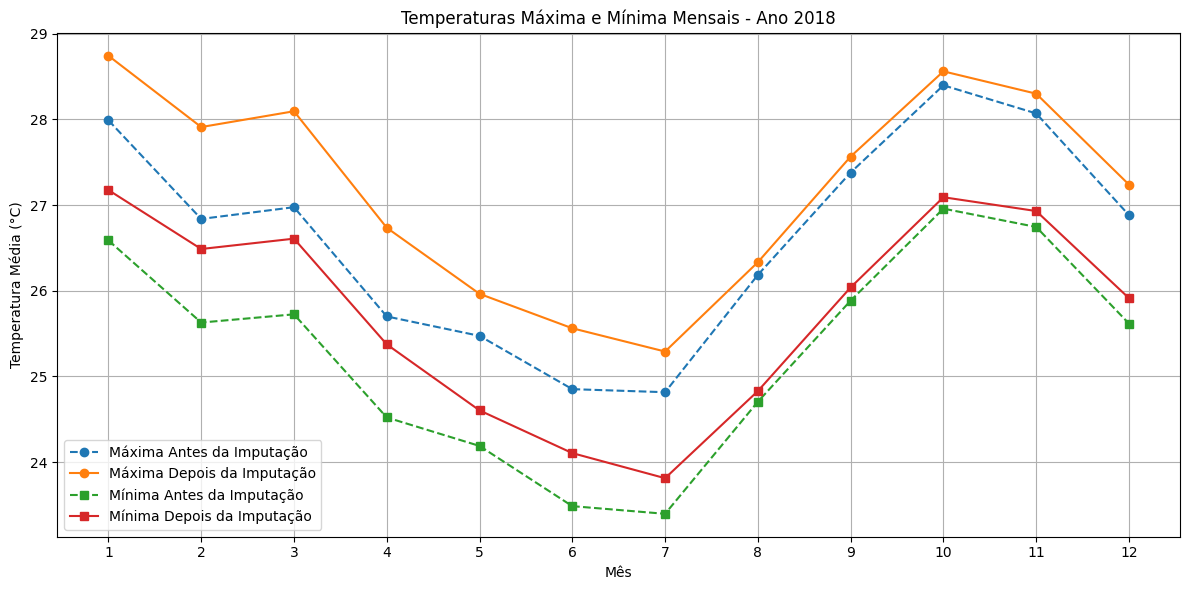

Processando o ano 2019...


Downloading: 100%|██████████| 762120/762120 [03:43<00:00, 3416.56rows/s]


Processing target column: temperatura_max
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.09242143729749194
Mean Absolute Error: 0.22340861767693485
R² Score: 0.9956916538740018
Remaining missing values in temperatura_max: 0
Processing target column: temperatura_min
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.08707644967375928
Mean Absolute Error: 0.21979857640933825
R² Score: 0.9956478680214311
Remaining missing values in temperatura_min: 0
Dataset imputado para 2019 salvo com sucesso em ../dados/estacoes/dataset_imputed_2019.csv
Iniciando plotagem para o ano 2019...


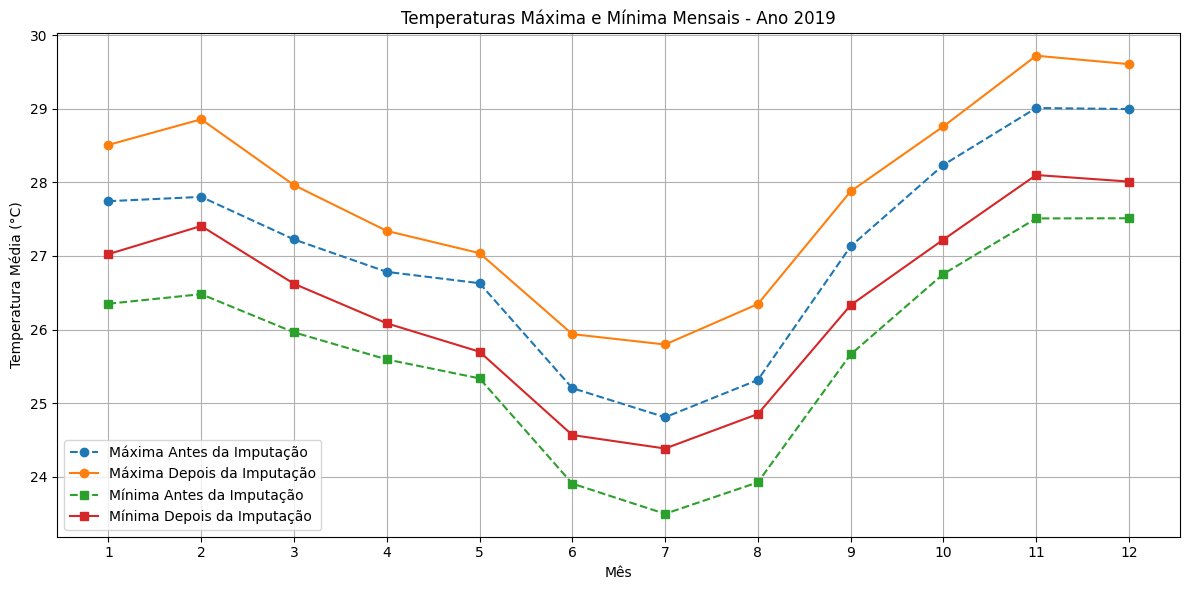

Processando o ano 2020...


Downloading: 100%|██████████| 764208/764208 [03:26<00:00, 3706.44rows/s]


Processing target column: temperatura_max
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.09232126094389617
Mean Absolute Error: 0.21971357586675153
R² Score: 0.9951421152846859
Remaining missing values in temperatura_max: 0
Processing target column: temperatura_min
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.09248836479829038
Mean Absolute Error: 0.22476553354328704
R² Score: 0.9948147131213908
Remaining missing values in temperatura_min: 0
Dataset imputado para 2020 salvo com sucesso em ../dados/estacoes/dataset_imputed_2020.csv
Iniciando plotagem para o ano 2020...


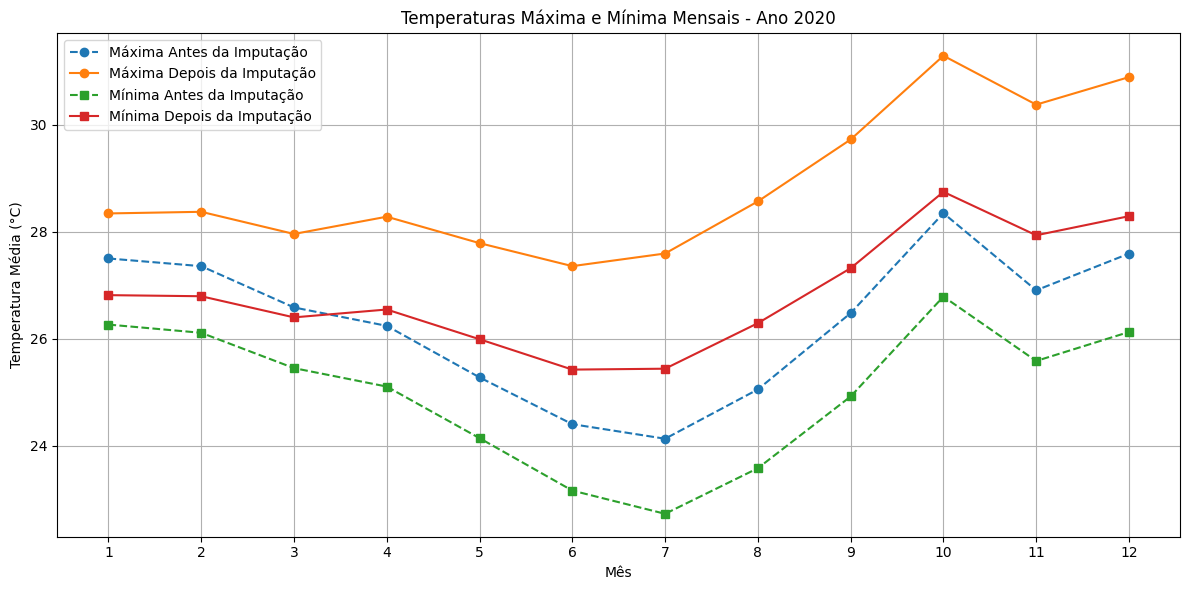

Processando o ano 2021...


Downloading: 100%|██████████| 762120/762120 [02:56<00:00, 4324.18rows/s]


Processing target column: temperatura_max
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.09387652475688738
Mean Absolute Error: 0.22305990356106187
R² Score: 0.9952769962168181
Remaining missing values in temperatura_max: 0
Processing target column: temperatura_min
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.09299196088669641
Mean Absolute Error: 0.22812125622912133
R² Score: 0.9950210887912576
Remaining missing values in temperatura_min: 0
Dataset imputado para 2021 salvo com sucesso em ../dados/estacoes/dataset_imputed_2021.csv
Iniciando plotagem para o ano 2021...


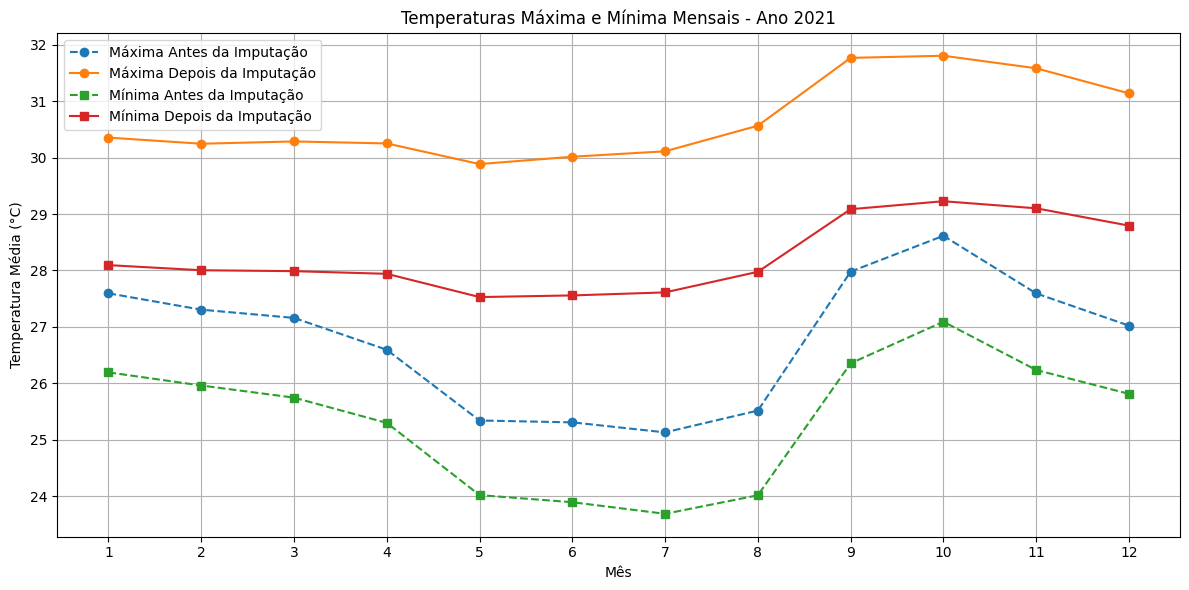

Processando o ano 2022...


Downloading: 100%|██████████| 753360/753360 [03:00<00:00, 4176.08rows/s]


Processing target column: temperatura_max
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.09038910521047026
Mean Absolute Error: 0.22069085519192183
R² Score: 0.9953869106999653
Remaining missing values in temperatura_max: 0
Processing target column: temperatura_min
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mean Squared Error: 0.09521513716052306
Mean Absolute Error: 0.2299106080905276
R² Score: 0.994849610492906
Remaining missing values in temperatura_min: 0
Dataset imputado para 2022 salvo com sucesso em ../dados/estacoes/dataset_imputed_2022.csv
Iniciando plotagem para o ano 2022...


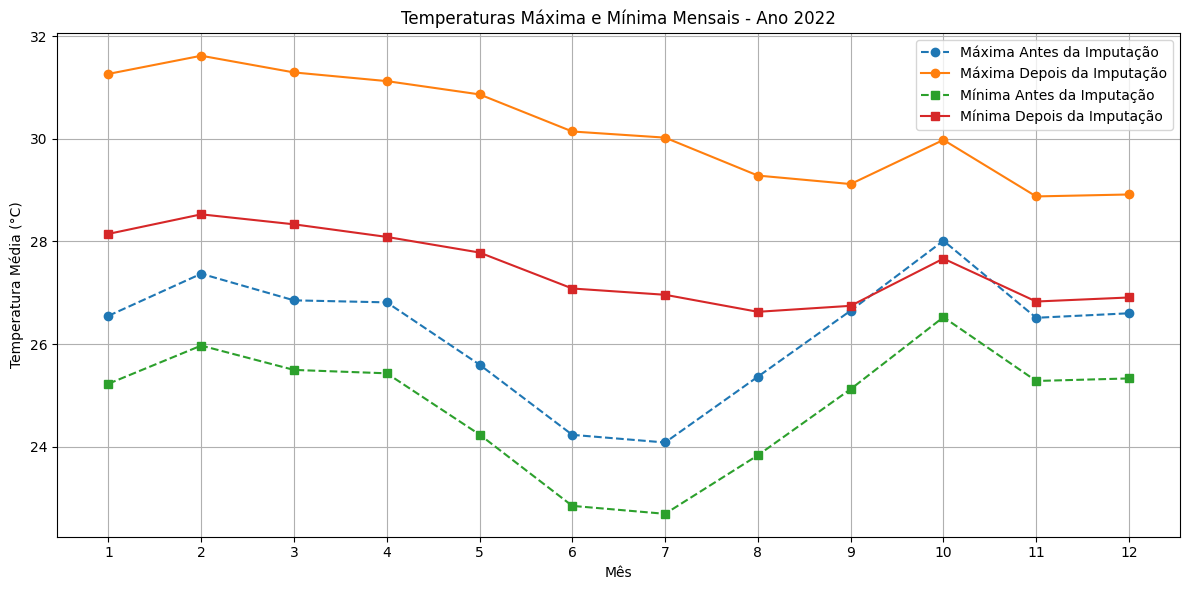

In [3]:
# Lista das colunas alvo
target_columns = [
    'temperatura_max',
    'temperatura_min'
]

# Lista de anos que deseja processar
years = [2003,2004,2005,2006,2007,2008,
        2009,2010,2011,2012,2013,2014,2015,2016,2017,
        2018,2019,2020,2021,2022]

for year in years:
    print(f'Processando o ano {year}...')
    # Recuperando os dados das estações para o ano específico
    df_meta_dados = fetch_inmet_data([year])
    
    if not df_meta_dados.empty:
        # Converter 'data' para datetime
        df_meta_dados['data'] = pd.to_datetime(df_meta_dados['data'], format='%Y-%m-%d', errors='coerce')
        
        # Verificar se a conversão foi bem-sucedida
        if df_meta_dados['data'].isnull().any():
            print(f"Aviso: Algumas datas no ano {year} não foram convertidas corretamente.")
        
        # Preserve os dados antes da imputação
        df_before_imputation = df_meta_dados.copy()
        
        # Executar o pipeline
        df_imputed = run_pipeline(df_meta_dados, target_columns)
       
        # Salvar o dataset com valores imputados
        file_path = f'../dados/estacoes/dataset_imputed_{year}.csv'
        df_imputed.to_csv(file_path, index=False)
        print(f"Dataset imputado para {year} salvo com sucesso em {file_path}")
        
        # Plotar as temperaturas antes e depois da imputação
        plot_average_temperatures(df_before_imputation, df_imputed, year)
    else:
        print(f"Nenhum dado encontrado para o ano de {year}. O pipeline não foi executado.")